## Fashion MNIST experiments

Build neural network machine learning model to use Fashion MNIST for training. 
To visualize the information plane. 

In [1]:
from utils import load_mnist
import utils
import numpy as np
from mlp import Layer, LayerArgs, Model, ModelArgs
from collections import Counter
import math
from mi_tool import MI
import plot_tool
reload(plot_tool)

<module 'plot_tool' from 'plot_tool.pyc'>

In [2]:
%matplotlib inline

In [4]:
X_train, y_train = load_mnist('../fashion-mnist/data/fashion/', kind='train')
X_test, y_test = load_mnist('../fashion-mnist/data/fashion/', kind='t10k')

# normalize inputs
X_train, X_test = np.multiply(X_train, 1.0 / 255.0), np.multiply(X_test, 1.0 / 255.0)
X_train, y_train = utils.unison_shuffled_copies(X_train, y_train)
X_train_subset, y_train_subset = X_train[:10000], y_train[:10000]

In [5]:
def build_run_model(model_args):
    model = Model(layer_args, model_args)
    model.feed_data(X_train, y_train, X_test, y_test)
    model.trial_data(X_train_subset, y_train_subset)
    model.intialize_model()
    MI_client = MI(X_train_subset, y_train_subset, 10)
    MI_client.discretize()
    MI_client.pre_compute()
    for epoch, hidden_layers in model.run_model():
        MI_client.mi_single_epoch(hidden_layers, epoch)
    
    return model, MI_client

# Find the best learning rate
* define the network structure with 1 hidden layer for tuning 
* other parameters were set to default, activation function is set to RELU by default. 

In [6]:
options_learning_rate = [1, 0.1, 0.03, 0.0001]
for lr in options_learning_rate:
    print "Learning Rate ... ", lr
    layer_args = [LayerArgs(784, 784, layer_type = "INPUT", learning_rate=lr), \
                  LayerArgs(784, 30, learning_rate=lr), \
                  LayerArgs(30, 10, layer_type = "OUTPUT", activate = np.exp, learning_rate=lr)]

    # set max #(epoch) as 80 and max #(iteration) as 1000 in case to save execution time;
    # For everay 500 iterations, we compute (and plot) MI;
    # Choose batch_size to be 20 because SGD (whose batch_size is 1) always has much longer execution time
    # and have less accuracy.

    model_args = ModelArgs(num_passes = 80, max_iter=1000, report_interval=500, batch_size=20)
    build_run_model(model_args)

Learning Rate ...  1
At pass:  1
MI reported at iteration: 500
MI reported at iteration: 1000
Epoch: 1, Train Acc: 0.832666666667, Test Acc: 0.8204
Learning Rate ...  0.1
At pass:  1
MI reported at iteration: 500
MI reported at iteration: 1000
Epoch: 1, Train Acc: 0.837783333333, Test Acc: 0.8252
Learning Rate ...  0.03
At pass:  1
MI reported at iteration: 500
MI reported at iteration: 1000
Epoch: 1, Train Acc: 0.825716666667, Test Acc: 0.8134
Learning Rate ...  0.0001
At pass:  1
MI reported at iteration: 500
MI reported at iteration: 1000
Epoch: 1, Train Acc: 0.350933333333, Test Acc: 0.3507


# one hidden layer

At pass:  1
MI reported at iteration: 500
MI reported at iteration: 1000
Epoch: 1, Train Acc: 0.836366666667, Test Acc: 0.8237


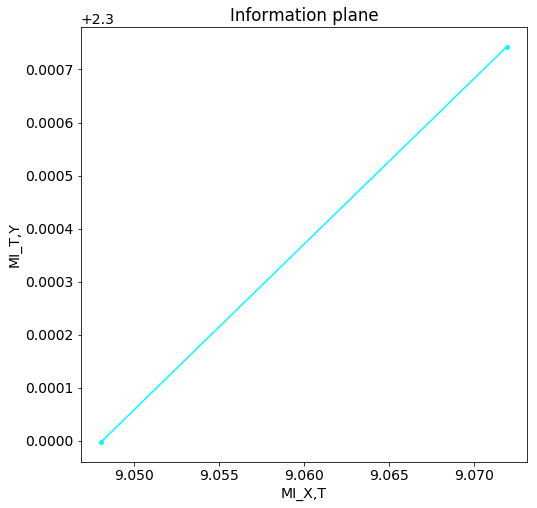

In [22]:
lr = 0.1

layer_args = [LayerArgs(784, 784, layer_type = "INPUT", learning_rate=lr), \
              LayerArgs(784, 20, learning_rate=lr), \
              LayerArgs(20, 10, layer_type = "OUTPUT", activate = np.exp, learning_rate=lr)]

    # set max #(epoch) as 80 and max #(iteration) as 1000 in case to save execution time;
    # For everay 500 iterations, we compute (and plot) MI;
    # Choose batch_size to be 20 because SGD (whose batch_size is 1) always has much longer execution time
    # and have less accuracy.

model_args = ModelArgs(num_passes = 80, max_iter=1000, report_interval=500, batch_size = 20)
model, MI_client = build_run_model(model_args)
reload(plot_tool)
plot_tool.mi_plot(MI_client)

# two hidden layers

At pass:  1
MI reported at iteration: 500
MI reported at iteration: 1000
Epoch: 1, Train Acc: 0.829866666667, Test Acc: 0.8154


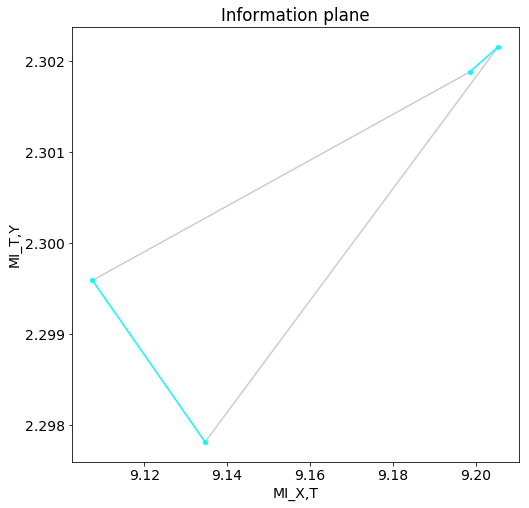

In [15]:
lr = 0.1

layer_args = [LayerArgs(784, 784, layer_type = "INPUT", learning_rate=lr), \
              LayerArgs(784, 30, learning_rate=lr), \
              LayerArgs(30, 20, learning_rate=lr), \
              LayerArgs(20, 10, layer_type = "OUTPUT", activate = np.exp, learning_rate=lr)]

    # set max #(epoch) as 80 and max #(iteration) as 1000 in case to save execution time;
    # For everay 500 iterations, we compute (and plot) MI;
    # Choose batch_size to be 20 because SGD (whose batch_size is 1) always has much longer execution time
    # and have less accuracy.

model_args = ModelArgs(num_passes = 80, max_iter=1000, report_interval=500, batch_size = 20)

model, MI_client = build_run_model(model_args)
reload(plot_tool)
plot_tool.mi_plot(MI_client)

# 3 hidden layers

At pass:  1
MI reported at iteration: 500
MI reported at iteration: 1000
Epoch: 1, Train Acc: 0.833, Test Acc: 0.8192


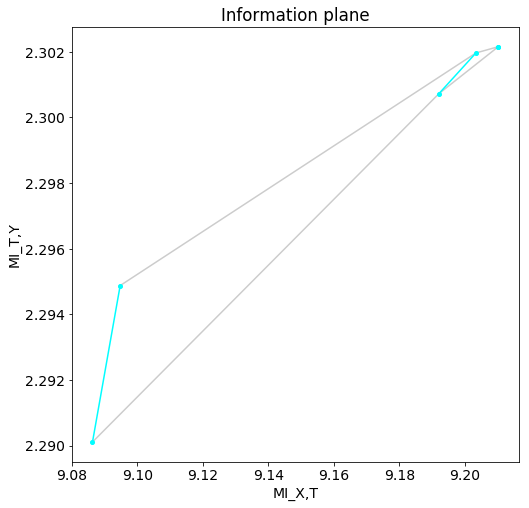

In [17]:
lr = 0.1

layer_args = [LayerArgs(784, 784, layer_type = "INPUT", learning_rate=lr), \
              LayerArgs(784, 40, learning_rate=lr), \
              LayerArgs(40, 30, learning_rate=lr), \
              LayerArgs(30, 20, learning_rate=lr), \
              LayerArgs(20, 10, layer_type = "OUTPUT", activate = np.exp, learning_rate=lr)]

    # set max #(epoch) as 80 and max #(iteration) as 1000 in case to save execution time;
    # For everay 500 iterations, we compute (and plot) MI;
    # Choose batch_size to be 20 because SGD (whose batch_size is 1) always has much longer execution time
    # and have less accuracy.

model_args = ModelArgs(num_passes = 80, max_iter=1000, report_interval=500, batch_size = 20)
model, MI_client = build_run_model(model_args)
reload(plot_tool)
plot_tool.mi_plot(MI_client)

# 4 hidden layers

At pass:  1
MI reported at iteration: 500
MI reported at iteration: 1000
Epoch: 1, Train Acc: 0.829016666667, Test Acc: 0.8158


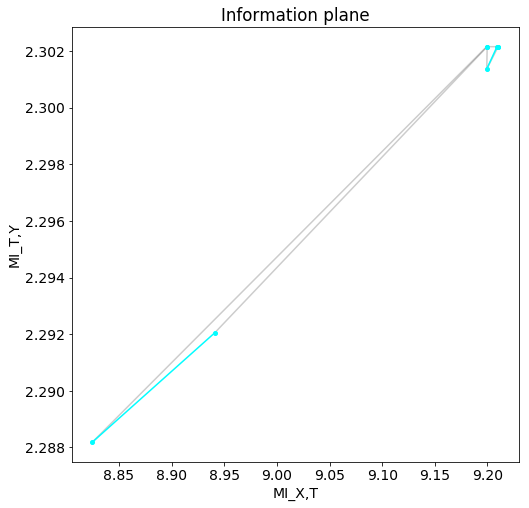

In [16]:
lr = 0.1

layer_args = [LayerArgs(784, 784, layer_type = "INPUT", learning_rate=lr), \
              LayerArgs(784, 50, learning_rate=lr), \
              LayerArgs(50, 40, learning_rate=lr), \
              LayerArgs(40, 30, learning_rate=lr), \
              LayerArgs(30, 20, learning_rate=lr), \
              LayerArgs(20, 10, layer_type = "OUTPUT", activate = np.exp, learning_rate=lr)]

    # set max #(epoch) as 80 and max #(iteration) as 1000 in case to save execution time;
    # For everay 500 iterations, we compute (and plot) MI;
    # Choose batch_size to be 20 because SGD (whose batch_size is 1) always has much longer execution time
    # and have less accuracy.

model_args = ModelArgs(num_passes = 80, max_iter=1000, report_interval=500, batch_size = 20)
model, MI_client = build_run_model(model_args)
reload(plot_tool)
plot_tool.mi_plot(MI_client)

# 5 hidden layers

At pass:  1
MI reported at iteration: 500
MI reported at iteration: 1000
Epoch: 1, Train Acc: 0.839616666667, Test Acc: 0.829


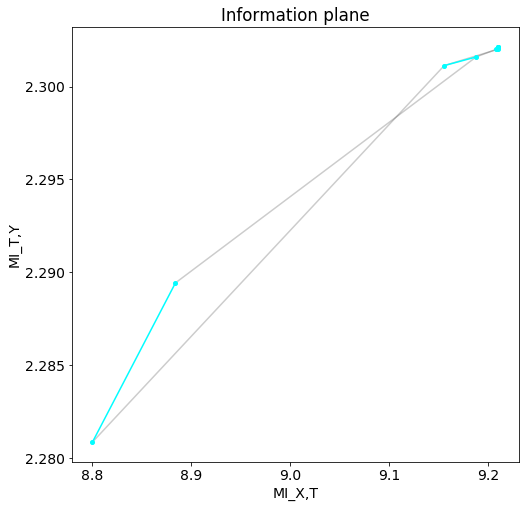

In [23]:
lr = 0.1

layer_args = [LayerArgs(784, 784, layer_type = "INPUT", learning_rate=lr), \
              LayerArgs(784, 60, learning_rate=lr), \
              LayerArgs(60, 50, learning_rate=lr), \
              LayerArgs(50, 40, learning_rate=lr), \
              LayerArgs(40, 30, learning_rate=lr), \
              LayerArgs(30, 20, learning_rate=lr), \
              LayerArgs(20, 10, layer_type = "OUTPUT", activate = np.exp, learning_rate=lr)]

    # set max #(epoch) as 80 and max #(iteration) as 1000 in case to save execution time;
    # For everay 500 iterations, we compute (and plot) MI;
    # Choose batch_size to be 20 because SGD (whose batch_size is 1) always has much longer execution time
    # and have less accuracy.

model_args = ModelArgs(num_passes = 80, max_iter=1000, report_interval=500, batch_size = 20)
model, MI_client = build_run_model(model_args)
reload(plot_tool)
plot_tool.mi_plot(MI_client)

# 6 hidden layers

At pass:  1
MI reported at iteration: 500
MI reported at iteration: 1000
Epoch: 1, Train Acc: 0.8334, Test Acc: 0.8204


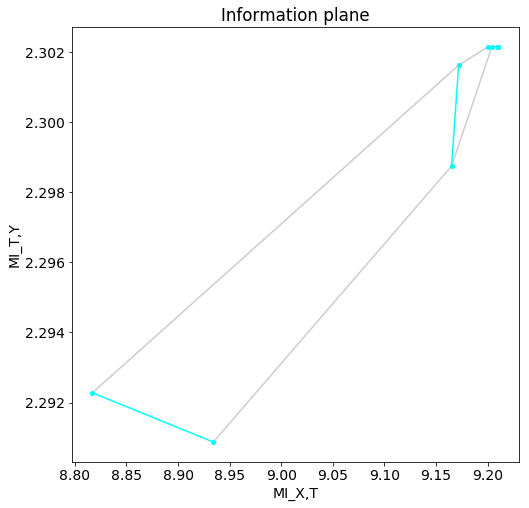

In [24]:
lr = 0.1

layer_args = [LayerArgs(784, 784, layer_type = "INPUT", learning_rate=lr), \
              LayerArgs(784, 70, learning_rate=lr), \
              LayerArgs(70, 60, learning_rate=lr), \
              LayerArgs(60, 50, learning_rate=lr), \
              LayerArgs(50, 40, learning_rate=lr), \
              LayerArgs(40, 30, learning_rate=lr), \
              LayerArgs(30, 20, learning_rate=lr), \
              LayerArgs(20, 10, layer_type = "OUTPUT", activate = np.exp, learning_rate=lr)]

    # set max #(epoch) as 80 and max #(iteration) as 1000 in case to save execution time;
    # For everay 500 iterations, we compute (and plot) MI;
    # Choose batch_size to be 20 because SGD (whose batch_size is 1) always has much longer execution time
    # and have less accuracy.

model_args = ModelArgs(num_passes = 80, max_iter=1000, report_interval=500, batch_size = 20)
model, MI_client = build_run_model(model_args)
reload(plot_tool)
plot_tool.mi_plot(MI_client)